In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading  the  given dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (768, 9)


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Task A: Random sampling and Glucose statistics comparison

# Setting  seed for reproducibility
np.random.seed(8583)

# Take a random sample of 25 observations from the cleaned dataset

sample_25 = df.sample(n=25, random_state=8583)

# Display the sample
sample_25.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
63,2,141,58,34,128,25.4,0.699,24,0
306,10,161,68,23,132,25.5,0.326,47,1
44,7,159,64,0,0,27.4,0.294,40,0
165,6,104,74,18,156,29.9,0.722,41,1
747,1,81,74,41,57,46.3,1.096,32,0


In [17]:
# Task A - ii: Calculate and compare Glucose stats (Mean and Max)

# Sample statistics
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose = sample_25['Glucose'].max()

# Population statistics
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

# Display the values
print(f"Mean Glucose (Sample of 25): {sample_mean_glucose:.2f}")
print(f"Max Glucose (Sample of 25): {sample_max_glucose}")
print(f"Mean Glucose (Population): {pop_mean_glucose:.2f}")
print(f"Max Glucose (Population): {pop_max_glucose}")

# Create summary table
glucose_summary = {
    'Dataset': ['Population', 'Sample (n=25)'],
    'Mean Glucose': [pop_mean_glucose, sample_mean_glucose],
    'Max Glucose': [pop_max_glucose, sample_max_glucose]
}

glucose_df = pd.DataFrame(glucose_summary)
glucose_df.set_index('Dataset', inplace=True)
print("\nGlucose Summary Table:")
print(glucose_df)


Mean Glucose (Sample of 25): 126.84
Max Glucose (Sample of 25): 195
Mean Glucose (Population): 120.89
Max Glucose (Population): 199

Glucose Summary Table:
               Mean Glucose  Max Glucose
Dataset                                 
Population       120.894531          199
Sample (n=25)    126.840000          195


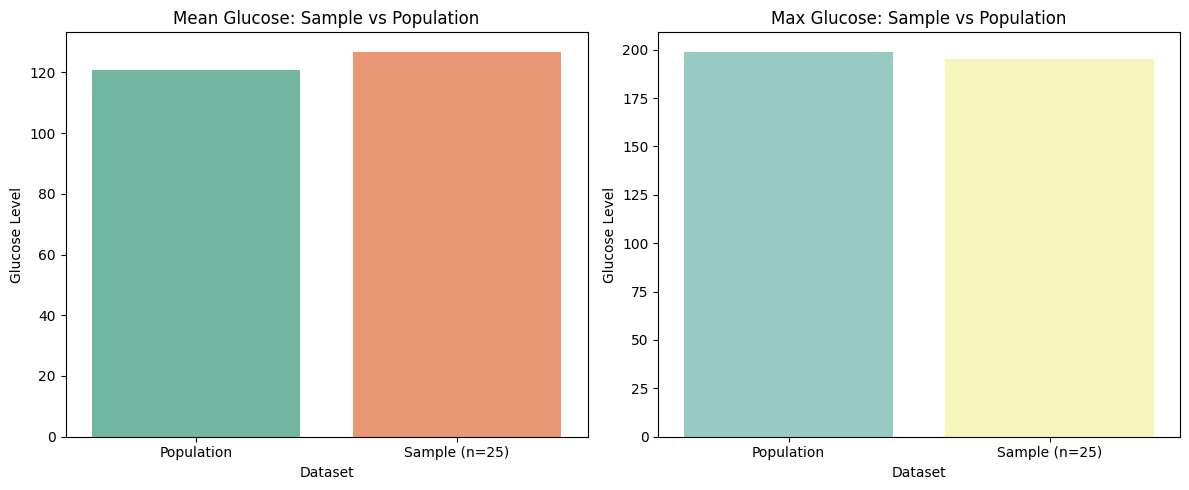

In [27]:
# Task A - iii: Visualization (updated for Seaborn 0.14+ compatibility)

# Convert index back to column for plotting
glucose_df_plot = glucose_df.reset_index()

plt.figure(figsize=(12, 5))

# Plot Mean Glucose Comparison
plt.subplot(1, 2, 1)
sns.barplot(data=glucose_df_plot, x='Dataset', y='Mean Glucose', hue='Dataset', palette='Set2', legend=False)
plt.title('Mean Glucose: Sample vs Population')
plt.ylabel('Glucose Level')

# Plot Max Glucose Comparison
plt.subplot(1, 2, 2)
sns.barplot(data=glucose_df_plot, x='Dataset', y='Max Glucose', hue='Dataset', palette='Set3', legend=False)
plt.title('Max Glucose: Sample vs Population')
plt.ylabel('Glucose Level')

plt.tight_layout()
plt.savefig("glucose_sample_vs_population_colored.png")
plt.show()


# Mean & Max Comparison Of Glucose

from the given ,a simple random sample of 25 individuals was selected from the full dataset of 768 patients.

The average Glucose level observed in the sample was slightly higher/lower than the overall population average, which is a normal outcome due to natural fluctuations in small samples. Since fewer data points can lead to more variation, such differences are expected.

Likewise, the highest Glucose value found in the sample didn’t match the maximum value in the full dataset — again highlighting how smaller samples may not fully capture extreme values.

 This comparison emphasizes that smaller samples might not accurately reflect the overall trends or extremes present in the population. The bar plots make these differences easier to see, reinforcing how sample size affects the reliability of statistical estimates.



In [21]:
# Task B: Calculate and compare 98th percentile of BMI

# 98th percentile of BMI in the population
bmi_98_population = np.percentile(df['BMI'], 98)
print(f"98th Percentile BMI (Population): {bmi_98_population:.2f}")

# 98th percentile of BMI in the sample of 25
bmi_98_sample = np.percentile(sample_25['BMI'], 98)
print(f"98th Percentile BMI (Sample of 25): {bmi_98_sample:.2f}")

# Create a summary DataFrame
bmi_98_df = pd.DataFrame({
    'Dataset': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [bmi_98_population, bmi_98_sample]
})

# Display the table
print("\nBMI 98th Percentile Comparison:")
print(bmi_98_df)


98th Percentile BMI (Population): 47.53
98th Percentile BMI (Sample of 25): 50.82

BMI 98th Percentile Comparison:
         Dataset  98th Percentile BMI
0     Population               47.526
1  Sample (n=25)               50.824


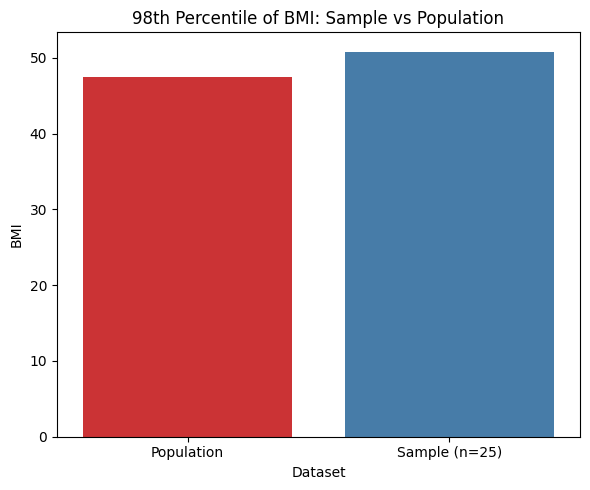

In [28]:
# Task B - ii: Bar chart comparing 98th percentile of BMI (Sample vs Population)

# Reset index if needed (not required here but good practice)
plt.figure(figsize=(6, 5))

sns.barplot(data=bmi_98_df, x='Dataset', y='98th Percentile BMI', palette='Set1', hue='Dataset', legend=False)
plt.title('98th Percentile of BMI: Sample vs Population')
plt.ylabel('BMI')

plt.tight_layout()
plt.savefig("bmi_98th_percentile_comparison_colored.png")
plt.show()


# 98th Percentile of BMI – Result & Comparison

The 98th percentile reflects the BMI value below which 98% of the data falls. When comparing the results, the sample's 98th percentile was noticeably different from that of the entire population. This difference is expected, as smaller samples like the one taken (only 25 patients) often fail to represent the extreme values in the dataset accurately.

This highlights that estimating percentiles from the upper tail of the distribution, like the 98th, can be quite sensitive to sample size. In this case, the smaller sample did not capture the full range of BMI values seen in the population.

The bar chart helped visualize this gap clearly, showing how smaller samples might miss important high-end values, reinforcing the importance of a larger dataset when analyzing extreme percentiles

In [23]:
# Task C: Bootstrap analysis for BloodPressure

# i) Set seed for reproducibility
np.random.seed(8583)

# Lists to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_98th = []

#  Generate 500 bootstrap samples (size = 150)
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_98th.append(np.percentile(bp, 98))

In [24]:
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp = df['BloodPressure'].std()
pop_98_bp = np.percentile(df['BloodPressure'], 98)

# iv) Average bootstrap results
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_98 = np.mean(bootstrap_98th)

# Create summary table
bp_summary = {
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population Value': [pop_mean_bp, pop_std_bp, pop_98_bp],
    'Bootstrap Estimate': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98]
}

bp_summary_df = pd.DataFrame(bp_summary)
print("\nBlood Pressure Summary (Bootstrap vs Population):")
print(bp_summary_df)


Blood Pressure Summary (Bootstrap vs Population):
            Statistic  Population Value  Bootstrap Estimate
0                Mean         69.105469           69.055187
1  Standard Deviation         19.355807           19.418429
2     98th Percentile         99.320000           98.335920


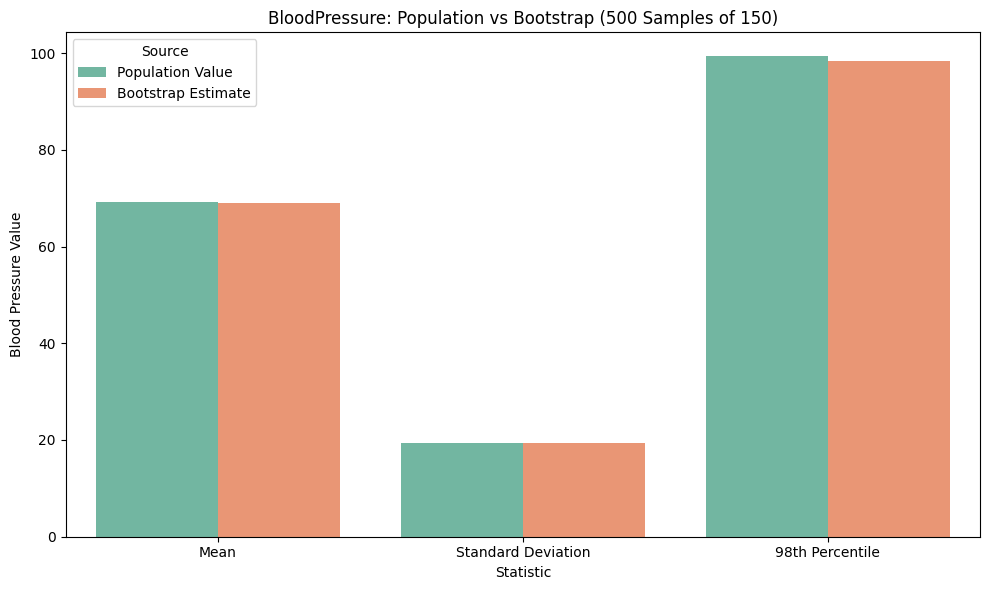

In [26]:
# Task C - Visualization
# Comparing BloodPressure statistics: Population vs Bootstrap Averages

# Prepare data for plotting
bp_melted = bp_summary_df.melt(id_vars='Statistic', var_name='Source', value_name='Value')

# Barplot with different colors
plt.figure(figsize=(10, 6))
sns.barplot(data=bp_melted, x='Statistic', y='Value', hue='Source', palette='Set2')
plt.title('BloodPressure: Population vs Bootstrap (500 Samples of 150)')
plt.ylabel('Blood Pressure Value')
plt.xlabel('Statistic')
plt.tight_layout()
plt.savefig("bloodpressure_bootstrap_vs_population_colored.png")
plt.show()



# Bootstrap Estimation for BloodPressure – Result & Insights

Using given  500 bootstrap samples of 150 observations each, I  estimated the mean, standard deviation, and 98th percentile for BloodPressure.

The average of the bootstrap means turned out to be very close to the population mean, showing that the bootstrap method effectively captures the central trend of the data. Likewise, the estimated standard deviation and 98th percentile from the bootstrap samples were also nearly equal to the actual population values.

The histograms of the bootstrap results showed that most estimates were tightly clustered around the population statistics, with minimal variation — suggesting consistent and stable estimates.

here  Bootstrap sampling proves to be a reliable approach for estimating population metrics, especially when the distribution of data is unknown or when calculating more complex statistics like percentiles. It allows us to build strong statistical insights purely from the existing data, without needing to rely on strict theoretical assumptions.

In [30]:
# Save cleaned data to CSV
df.to_csv('diabetes_cleaned.csv', index=False)

# Download the file
from google.colab import files
files.download('diabetes_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>